In [1]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('yathzee-dataset.csv')

In [3]:
df

,dice1,dice2,dice3,dice4,dice5,label
0,3,6,6,2,5,nothing
1,3,6,1,3,4,nothing
2,2,2,5,5,3,nothing
3,1,3,6,6,1,nothing
4,1,4,6,3,5,small-straight
...,...,...,...,...,...,...
5827,5,6,6,5,5,full-house
5828,1,3,1,2,3,nothing
5829,1,1,5,5,3,nothing
5830,3,3,6,4,2,nothing


In [4]:
df.describe()

,dice1,dice2,dice3,dice4,dice5
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,3.485425,3.495370,3.485597,3.477366,3.513032
std,1.709014,1.708768,1.708714,1.719131,1.711633
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000


In [14]:
# first lets create a dataframe with the existing types in yathzeee

yahtzee_types = df['label'].drop_duplicates()

yaht_types_df = pd.DataFrame(yahtzee_types, columns=['label']).reset_index().drop(columns=['index'])
yaht_types_df

,label
0,nothing
1,small-straight
2,three-of-a-kind
3,large-straight
4,full-house
5,four-of-a-kind
6,yathzee


In [15]:
# now lets use the oneHetEncoder to encode our yathzee labels. After that we will add this to our dataframe

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(yaht_types_df[['label']]).toarray())

yaht_types_df = yaht_types_df.join(enc_df)
yaht_types_df
#classes = pd.get_dummies(df['label'].drop_duplicates())
#classes

,label,0,1,2,3,4,5,6
0,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,small-straight,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,three-of-a-kind,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,large-straight,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,full-house,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,four-of-a-kind,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# nu hebben we onze classes met de bijbehorende coding. nu is het tijd om de dataset op te zetten

In [16]:
# allereerst importeren we de benodige bibliotheken

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

Yathzee is een spel waarbij er met 6 dobbelstenen wordt gegooid. Aan de hand van deze dobbelstenen wordt er een resultaat behaald, waarmee de speler punten kan pakken. Hieruit is het duidelijk dat de zes dobbelstenen de benodigde features zijn voor het neuraal netwerk. Hieronder zullen we de dataset klaarzetten zodat het gereed is voor gebruik voor het neuraal netwerk.

In [18]:


features = ['dice1', 'dice2', 'dice3', 'dice4', 'dice5']
outputs = [0, 1, 2, 3, 4, 5, 6]

result = pd.merge(df, yaht_types_df, how='left', on='label')
result

,dice1,dice2,dice3,dice4,dice5,label,0,1,2,3,4,5,6
0,3,6,6,2,5,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,6,1,3,4,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2,5,5,3,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,3,6,6,1,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,4,6,3,5,small-straight,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,5,6,6,5,5,full-house,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5828,1,3,1,2,3,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5829,1,1,5,5,3,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5830,3,3,6,4,2,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0


De dataset is nu klaar voor gebruik. We zullen het eerst splitsen in train en test data. Deze test data bewaren we voor later om het neuraal netwerk te valideren. Hiermee willen we de het model testen op overfitting.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
        result[features], result[outputs], test_size=0.1, random_state=0)

De dataset is nu gesplits in training en test data. De features moeten nog wel genormaliseerd worden zodat het gebruikt kan worden als input data voor het neuraal netwerk. Hiervoor gebruiken we een standaard preprocessing tool voor. De normalizer voegen we toe aan het model zodat dit hierin wordt gedaan. Hierdoor hoeven we zelf niet code te schrijven om de date te normaliseren voor het trainen en testen.

In [22]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.to_numpy())

model = tf.keras.Sequential()

# add preprocessor
model.add(normalizer)

Nu we het normaliseren van data ook gereed hebben, kunnen we beginnen met het maken van onze eerste versie van het neuraal netwerk. Uit de sheets van Saxion is het duidelijk dat een neuraal netwerk bestaat uit een:

- Input Layer
- Hidden Layer(s)
- Output Layer

In de input layer geven we de features mee. Aangezien we 5 features hebben, moeten we de input layer aanmaken met 5 nodes.

Voor de hidden layer(s) gebruiken we nu even een standaard opzet van 2 layers die ieder bestaat uit 10 nodes.

De output layer zal gelijk zijn aan de aantal classes die we hebben. Dit zijn er 7. Dat betekent dat we een output layer zullen maken van 7 nodes. Voor deze layer zullen we softmax gebruiken, omdat het om een classificatie probleem gaat. 

In [71]:
# input layers
model.add(tf.keras.Input(shape=(5,)))

# hidden layers

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))

# output layers
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

(5248, 7)

De eerste neurale netwerk is opgezet. Dit kunnen we nu gebruiken om het model te trainen en testen

In [72]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=5)

Epoch 1/20
945/945 [==============================] - 8s 5ms/step - loss: 1.3741 - accuracy: 0.6174 - val_loss: 1.1588 - val_accuracy: 0.6362
Epoch 2/20
945/945 [==============================] - 3s 3ms/step - loss: 1.0874 - accuracy: 0.6692 - val_loss: 1.1501 - val_accuracy: 0.6362
Epoch 3/20
945/945 [==============================] - 3s 3ms/step - loss: 1.0842 - accuracy: 0.6759 - val_loss: 1.1499 - val_accuracy: 0.6362
Epoch 4/20
945/945 [==============================] - 3s 3ms/step - loss: 1.1129 - accuracy: 0.6631 - val_loss: 1.1519 - val_accuracy: 0.6362
Epoch 5/20
945/945 [==============================] - 3s 3ms/step - loss: 1.0746 - accuracy: 0.6753 - val_loss: 1.1454 - val_accuracy: 0.6362
Epoch 6/20
945/945 [==============================] - 3s 3ms/step - loss: 1.1039 - accuracy: 0.6662 - val_loss: 1.1446 - val_accuracy: 0.6362
Epoch 7/20
945/945 [==============================] - 3s 3ms/step - loss: 1.0961 - accuracy: 0.6681 - val_loss: 1.1505 - val_accuracy: 0.6362
Epoch 

,dice1,dice2,dice3,dice4,dice5,label,0,1,2,3,4,5,6
0,3,6,6,2,5,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,6,1,3,4,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2,5,5,3,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,3,6,6,1,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,4,6,3,5,small-straight,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,5,6,6,5,5,full-house,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5828,1,3,1,2,3,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5829,1,1,5,5,3,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5830,3,3,6,4,2,nothing,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Na het eerste keer testen en valideren zien we dat de accuraatheid van het neuraal netwerk op een redelijk niveau zit. Op dit moment wordt er een gemiddelde accuraatheid van 0.66 gehaald. de loss functie zit nog hoog. het idee is om dit te verbeteren. Op dit moment kan ik nog geen conclusies trekken over de resultaten. Om een beter inzicht te hebben zullen we eerst naar de dataset kijken.

In [334]:
result['label'].value_counts()

nothing            3868
three-of-a-kind     896
small-straight      549
full-house          221
large-straight      178
four-of-a-kind      116
yathzee               4
Name: label, dtype: int64

Hierboven hebben we een overzicht gemaakt van de dataset. Hier is te zien wat de balans is tussen de verschillende classes. Daaruit blijkt dat er inderdaad een groot verschil is in aantal tussen de classes. Het is belangrijk dat er een balans is tussen de classes. Dit is namelijk beter voor het neurale netwerk.

Allereerst willen we de aantal voor Yathzee verhogen. Dit is aan de zeer lage kant. Dit moeten we dus upscalen. Hiervoor zullen we de upsampler techniek gebruiken. Allereerst kijken we naar de voorbeelden die er bestaan.

In [335]:
from sklearn.utils import resample

df_minority = result.loc[result[6] == 1]
df_minority

,dice1,dice2,dice3,dice4,dice5,label,0,1,2,3,4,5,6
1101,5,5,5,5,5,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1180,2,2,2,2,2,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1602,6,6,6,6,6,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5504,3,3,3,3,3,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In de resultaten zien we dat er voorbeelden ontbreken voor de yathzee met nummer 1 en 4. Allereerst zullen we dit toevoegen aan de lijst.

In [336]:
df_minority_missed =  pd.DataFrame([[1, 1, 1, 1, 1, 'yathzee', 0, 0, 0, 0, 0, 0, 1], 
                                    [4, 4, 4, 4, 4, 'yathzee', 0, 0, 0, 0, 0, 0, 1]],
                                   columns=['dice1', 'dice2', 'dice3', 'dice4', 'dice5', 'label', 0, 1, 2, 3, 4, 5, 6])

df_minority = pd.concat([df_minority, df_minority_missed])
df_minority

,dice1,dice2,dice3,dice4,dice5,label,0,1,2,3,4,5,6
1101,5,5,5,5,5,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1180,2,2,2,2,2,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1602,6,6,6,6,6,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5504,3,3,3,3,3,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,1,1,1,1,1,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,4,4,4,4,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Nu zit iedere mogeljkheid erin. Dit willen we nu alleen upscalen zodat de aantallen in de buurt zit van de overige classes.

In [337]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

result_balanced = df_minority_upsampled
result_balanced

,dice1,dice2,dice3,dice4,dice5,label,0,1,2,3,4,5,6
1,4,4,4,4,4,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1602,6,6,6,6,6,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,1,1,1,1,1,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1602,6,6,6,6,6,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1180,2,2,2,2,2,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,5,5,5,5,5,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5504,3,3,3,3,3,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1101,5,5,5,5,5,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5504,3,3,3,3,3,yathzee,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Hierboven hebben we nu een lijst van 400 aantallen. Deze zijn gevuld met data voor de Yathzee class.

Hetzelfde zullen we nu ook uitvoeren voor de overige classes waarvan de aantal aan de lage kant zit.

In [338]:
df_minority = result.loc[result[0] == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [339]:
result_balanced = pd.concat([result_balanced, df_minority_upsampled])

In [340]:
df_minority = result.loc[result[2] == 1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [341]:
result_balanced = pd.concat([result_balanced, df_minority_upsampled])

In [342]:
df_minority = result.loc[result[1] == 1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [343]:
result_balanced = pd.concat([result_balanced, df_minority_upsampled])

In [344]:
df_majority = result.loc[result[4] == 1]
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [345]:
result_balanced = pd.concat([result_balanced, df_majority_upsampled])

In [346]:
df_majority = result.loc[result[5] == 1]
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [347]:
result_balanced = pd.concat([result_balanced, df_majority_upsampled])

In [348]:
df_majority = result.loc[result[3] == 1]
df_majority_upsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [349]:
result_balanced = pd.concat([result_balanced, df_majority_upsampled])

In [350]:
result_balanced = result_balanced.reset_index().drop(columns=['index'])

In [351]:
result_balanced['label'].value_counts()


large-straight     1000
four-of-a-kind     1000
three-of-a-kind    1000
nothing            1000
full-house         1000
small-straight     1000
yathzee            1000
Name: label, dtype: int64

In [352]:
features = ['dice1', 'dice2', 'dice3', 'dice4', 'dice5']
features2 = ['dice1', 'dice2', 'dice3', 'dice4', 'dice5', 'label']
features

['dice1', 'dice2', 'dice3', 'dice4', 'dice5']

In [353]:
features2

['dice1', 'dice2', 'dice3', 'dice4', 'dice5', 'label']

In [354]:
X_train, X_test, y_train, y_test = train_test_split(
        result_balanced[features2], result_balanced[outputs], test_size=0.1, random_state=28, shuffle=True)

In [355]:
X_train['label'].value_counts()

three-of-a-kind    915
full-house         902
nothing            901
small-straight     900
large-straight     899
yathzee            892
four-of-a-kind     891
Name: label, dtype: int64

In [499]:
X_train, X_test, y_train, y_test = train_test_split(
        result_balanced[features], result_balanced[outputs], test_size=0.1, random_state=28, shuffle=True)

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.to_numpy())

# add preprocessor
#model.add(normalizer)

adapt_data = np.array([1, 2, 3, 4, 5, 6])
input_data = np.array([1, 2, 3, 4, 5])
normalizer2 = preprocessing.Normalization(axis=None)
normalizer2.adapt(adapt_data)
normalizer2(X_train.to_numpy())

<tf.Tensor: shape=(6300, 5), dtype=float32, numpy=
array([[ 1.46385, -1.46385, -1.46385, -1.46385, -1.46385],
       [ 0.87831,  0.87831,  0.87831,  0.87831,  0.87831],
       [ 0.29277,  1.46385,  0.87831, -0.29277,  0.87831],
       [-1.46385, -1.46385,  1.46385,  1.46385,  1.46385],
       [-0.87831,  0.29277,  0.29277,  0.29277,  0.87831],
       [-0.87831,  0.29277, -1.46385, -1.46385, -0.29277],
       [ 0.29277,  1.46385,  1.46385,  1.46385,  1.46385],
       [ 0.87831,  1.46385,  1.46385,  1.46385,  1.46385],
       [-0.29277, -0.29277, -1.46385, -0.29277, -1.46385],
       [ 0.87831, -0.29277, -1.46385, -0.87831,  0.29277],
       [ 1.46385,  0.87831, -0.29277,  0.87831,  0.29277],
       [-0.87831, -0.87831,  0.87831, -0.29277,  1.46385],
       [-1.46385, -0.29277,  0.29277,  0.87831, -0.87831],
       [ 0.29277,  0.87831, -0.29277, -1.46385, -0.87831],
       [-0.29277, -0.29277,  0.29277,  0.29277,  0.29277],
       [ 0.29277,  1.46385,  1.46385,  0.29277,  0.29277],
     

In [399]:
#model.add(normalizer2)

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train_standard = standardScaler.fit_transform(X_train)

from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
X_train_minmax = minmaxScaler.fit_transform(X_train)

In [401]:
X_train_minmax

array([[1. , 0. , 0. , 0. , 0. ],
       [0.8, 0.8, 0.8, 0.8, 0.8],
       [0.6, 1. , 0.8, 0.4, 0.8],
       ...,
       [0.2, 0.2, 0.2, 1. , 0.2],
       [0.8, 0.6, 0.6, 1. , 0.4],
       [0.8, 0.8, 0.8, 0.8, 0.6]])

In [427]:
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='tanh'))

# hidden layers

model2.add(layers.Dense(10, activation='tanh'))
model2.add(layers.Dense(10, activation='tanh'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [428]:
history = model2.fit(X_train_minmax, y_train, validation_split=0.1, epochs=400, batch_size=16)

Epoch 1/400
355/355 [==============================] - 2s 3ms/step - loss: 1.9618 - accuracy: 0.1349 - val_loss: 1.9525 - val_accuracy: 0.1175
Epoch 2/400
355/355 [==============================] - 1s 2ms/step - loss: 1.9480 - accuracy: 0.1422 - val_loss: 1.9520 - val_accuracy: 0.1429
Epoch 3/400
355/355 [==============================] - 1s 2ms/step - loss: 1.9421 - accuracy: 0.1658 - val_loss: 1.9347 - val_accuracy: 0.1730
Epoch 4/400
355/355 [==============================] - 1s 2ms/step - loss: 1.9243 - accuracy: 0.1843 - val_loss: 1.9198 - val_accuracy: 0.1825
Epoch 5/400
355/355 [==============================] - 1s 2ms/step - loss: 1.8813 - accuracy: 0.2268 - val_loss: 1.8597 - val_accuracy: 0.2063
Epoch 6/400
355/355 [==============================] - 1s 2ms/step - loss: 1.8333 - accuracy: 0.2420 - val_loss: 1.8047 - val_accuracy: 0.2270
Epoch 7/400
355/355 [==============================] - 1s 2ms/step - loss: 1.7945 - accuracy: 0.2482 - val_loss: 1.7965 - val_accuracy: 0.2286

Epoch 58/400
355/355 [==============================] - 1s 2ms/step - loss: 0.9319 - accuracy: 0.6183 - val_loss: 0.9325 - val_accuracy: 0.6222
Epoch 59/400
355/355 [==============================] - 1s 3ms/step - loss: 0.9189 - accuracy: 0.6238 - val_loss: 0.9241 - val_accuracy: 0.6222
Epoch 60/400
355/355 [==============================] - 1s 2ms/step - loss: 0.9261 - accuracy: 0.6178 - val_loss: 0.9525 - val_accuracy: 0.6079
Epoch 61/400
355/355 [==============================] - 1s 2ms/step - loss: 0.9360 - accuracy: 0.6039 - val_loss: 0.9196 - val_accuracy: 0.6302
Epoch 62/400
355/355 [==============================] - 1s 2ms/step - loss: 0.9045 - accuracy: 0.6237 - val_loss: 0.9064 - val_accuracy: 0.6349
Epoch 63/400
355/355 [==============================] - 1s 2ms/step - loss: 0.9144 - accuracy: 0.6270 - val_loss: 0.9222 - val_accuracy: 0.6286
Epoch 64/400
355/355 [==============================] - 1s 2ms/step - loss: 0.9087 - accuracy: 0.6208 - val_loss: 0.9046 - val_accuracy:

Epoch 115/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7475 - accuracy: 0.6848 - val_loss: 0.7799 - val_accuracy: 0.6651
Epoch 116/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7448 - accuracy: 0.6810 - val_loss: 1.0849 - val_accuracy: 0.5921
Epoch 117/400
355/355 [==============================] - 1s 3ms/step - loss: 0.7736 - accuracy: 0.6757 - val_loss: 0.8303 - val_accuracy: 0.6397
Epoch 118/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7494 - accuracy: 0.6870 - val_loss: 0.7733 - val_accuracy: 0.6857
Epoch 119/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7489 - accuracy: 0.6791 - val_loss: 0.8250 - val_accuracy: 0.6444
Epoch 120/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7521 - accuracy: 0.6770 - val_loss: 0.8874 - val_accuracy: 0.6429
Epoch 121/400
355/355 [==============================] - 1s 3ms/step - loss: 0.7598 - accuracy: 0.6794 - val_loss: 0.7748 - val_ac

355/355 [==============================] - 1s 3ms/step - loss: 0.7108 - accuracy: 0.7005 - val_loss: 0.7357 - val_accuracy: 0.6857
Epoch 172/400
355/355 [==============================] - 1s 3ms/step - loss: 0.7141 - accuracy: 0.7022 - val_loss: 0.7442 - val_accuracy: 0.7032
Epoch 173/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7463 - accuracy: 0.6862 - val_loss: 0.7317 - val_accuracy: 0.7159
Epoch 174/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7253 - accuracy: 0.6978 - val_loss: 0.7303 - val_accuracy: 0.6794
Epoch 175/400
355/355 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.7154 - val_loss: 0.7383 - val_accuracy: 0.6889
Epoch 176/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7182 - accuracy: 0.7047 - val_loss: 0.7569 - val_accuracy: 0.6857
Epoch 177/400
355/355 [==============================] - 1s 2ms/step - loss: 0.7146 - accuracy: 0.7119 - val_loss: 0.7268 - val_accuracy: 0.7000

355/355 [==============================] - 0s 952us/step - loss: 0.6756 - accuracy: 0.7281 - val_loss: 0.8008 - val_accuracy: 0.6889
Epoch 228/400
355/355 [==============================] - 0s 949us/step - loss: 0.7040 - accuracy: 0.7115 - val_loss: 0.6988 - val_accuracy: 0.7127
Epoch 229/400
355/355 [==============================] - 0s 952us/step - loss: 0.6804 - accuracy: 0.7187 - val_loss: 0.8557 - val_accuracy: 0.6508
Epoch 230/400
355/355 [==============================] - 0s 968us/step - loss: 0.7175 - accuracy: 0.6873 - val_loss: 0.8012 - val_accuracy: 0.6730
Epoch 231/400
355/355 [==============================] - 0s 941us/step - loss: 0.8104 - accuracy: 0.6894 - val_loss: 0.7596 - val_accuracy: 0.6619
Epoch 232/400
355/355 [==============================] - 0s 958us/step - loss: 0.6704 - accuracy: 0.7234 - val_loss: 0.7410 - val_accuracy: 0.7048
Epoch 233/400
355/355 [==============================] - 0s 962us/step - loss: 0.7227 - accuracy: 0.7164 - val_loss: 0.7229 - val_ac

Epoch 283/400
355/355 [==============================] - 0s 978us/step - loss: 0.6677 - accuracy: 0.7282 - val_loss: 0.6976 - val_accuracy: 0.7159
Epoch 284/400
355/355 [==============================] - 0s 955us/step - loss: 0.6797 - accuracy: 0.7282 - val_loss: 0.6929 - val_accuracy: 0.7111
Epoch 285/400
355/355 [==============================] - 0s 978us/step - loss: 0.6393 - accuracy: 0.7330 - val_loss: 0.7136 - val_accuracy: 0.7175
Epoch 286/400
355/355 [==============================] - 0s 958us/step - loss: 0.6585 - accuracy: 0.7343 - val_loss: 0.9023 - val_accuracy: 0.6587
Epoch 287/400
355/355 [==============================] - 0s 966us/step - loss: 0.6593 - accuracy: 0.7365 - val_loss: 0.6953 - val_accuracy: 0.7238
Epoch 288/400
355/355 [==============================] - 0s 964us/step - loss: 0.6469 - accuracy: 0.7372 - val_loss: 0.6967 - val_accuracy: 0.7000
Epoch 289/400
355/355 [==============================] - 0s 978us/step - loss: 0.6354 - accuracy: 0.7480 - val_loss: 0

Epoch 339/400
355/355 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7853 - val_loss: 0.6209 - val_accuracy: 0.7651
Epoch 340/400
355/355 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.7960 - val_loss: 0.5880 - val_accuracy: 0.7810
Epoch 341/400
355/355 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.8021 - val_loss: 0.5792 - val_accuracy: 0.7778
Epoch 342/400
355/355 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.8031 - val_loss: 0.5899 - val_accuracy: 0.7905
Epoch 343/400
355/355 [==============================] - 0s 986us/step - loss: 0.5183 - accuracy: 0.8088 - val_loss: 0.6725 - val_accuracy: 0.7206
Epoch 344/400
355/355 [==============================] - 0s 983us/step - loss: 0.5208 - accuracy: 0.7950 - val_loss: 0.5977 - val_accuracy: 0.7825
Epoch 345/400
355/355 [==============================] - 0s 980us/step - loss: 0.5118 - accuracy: 0.8094 - val_loss: 0.5941 - 

355/355 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.8142 - val_loss: 0.5599 - val_accuracy: 0.7937
Epoch 396/400
355/355 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.8105 - val_loss: 0.5931 - val_accuracy: 0.7810
Epoch 397/400
355/355 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.8104 - val_loss: 0.7127 - val_accuracy: 0.7524
Epoch 398/400
355/355 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.8112 - val_loss: 0.5632 - val_accuracy: 0.7810
Epoch 399/400
355/355 [==============================] - 0s 986us/step - loss: 0.5129 - accuracy: 0.8003 - val_loss: 0.6172 - val_accuracy: 0.7714
Epoch 400/400
355/355 [==============================] - 0s 995us/step - loss: 0.5124 - accuracy: 0.8019 - val_loss: 0.6191 - val_accuracy: 0.7365


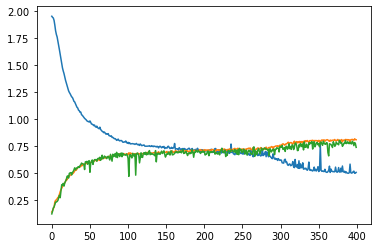

In [430]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')

pyplot.show()

We zullen de data normalizeren doormiddel van een standaard scaler. Nadat we dit hebben gedaan kunnen we verder met het opnieuw verifieren van het neurale netwerk.

In [432]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(10, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.9073 - accuracy: 0.2075 - val_loss: 1.6656 - val_accuracy: 0.3540
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.6059 - accuracy: 0.3470 - val_loss: 1.4987 - val_accuracy: 0.3825
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4538 - accuracy: 0.3919 - val_loss: 1.4108 - val_accuracy: 0.3952
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4077 - accuracy: 0.3916 - val_loss: 1.4362 - val_accuracy: 0.4000
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3707 - accuracy: 0.4228 - val_loss: 1.3386 - val_accuracy: 0.4206
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3423 - accuracy: 0.4340 - val_loss: 1.4010 - val_accuracy: 0.3683
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2875 - accuracy: 0.4717 - val_loss: 1.3112 - val_accuracy: 0.4508

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8825 - accuracy: 0.6493 - val_loss: 0.8777 - val_accuracy: 0.6540
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8946 - accuracy: 0.6447 - val_loss: 0.8725 - val_accuracy: 0.6746
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8943 - accuracy: 0.6543 - val_loss: 0.8410 - val_accuracy: 0.6810
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 0.9024 - accuracy: 0.6493 - val_loss: 0.9857 - val_accuracy: 0.6349
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8895 - accuracy: 0.6605 - val_loss: 0.9237 - val_accuracy: 0.6635
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8865 - accuracy: 0.6490 - val_loss: 0.9365 - val_accuracy: 0.6540
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8636 - accuracy: 0.6587 - val_loss: 1.6848 - val_accuracy:

De accuraatheid en loss ziet er beter uit op de nieuwe dataset. Voor nu gaan we bezig met het tweaken van het neurale netwerk. Hierbij gebruiken we de nieuwe dataset. Allereerst zullen we de verschillende Activatie functies testen voor de Hidden Layers:

- Sigmoid
- TanH
- ReLu

Volgens *Towards Data Science* is de ReLu de meest gebruikte activatie functies voor de huidige neurale netwerken.

## Sigmoid

In [433]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='sigmoid'))

# hidden layers

model2.add(layers.Dense(10, activation='sigmoid'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.9805 - accuracy: 0.1345 - val_loss: 1.9533 - val_accuracy: 0.1540
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9496 - accuracy: 0.1472 - val_loss: 1.9598 - val_accuracy: 0.1238
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9483 - accuracy: 0.1415 - val_loss: 1.9612 - val_accuracy: 0.1365
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9502 - accuracy: 0.1439 - val_loss: 1.9519 - val_accuracy: 0.1397
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9483 - accuracy: 0.1570 - val_loss: 1.9468 - val_accuracy: 0.1397
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9480 - accuracy: 0.1419 - val_loss: 1.9498 - val_accuracy: 0.1206
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9453 - accuracy: 0.1648 - val_loss: 1.9522 - val_accuracy: 0.1587

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3602 - accuracy: 0.4253 - val_loss: 1.3444 - val_accuracy: 0.4317
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3565 - accuracy: 0.4347 - val_loss: 1.3259 - val_accuracy: 0.4429
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3508 - accuracy: 0.4357 - val_loss: 1.3319 - val_accuracy: 0.4365
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3340 - accuracy: 0.4473 - val_loss: 1.3131 - val_accuracy: 0.4175
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3387 - accuracy: 0.4333 - val_loss: 1.3038 - val_accuracy: 0.4476
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3178 - accuracy: 0.4424 - val_loss: 1.2966 - val_accuracy: 0.4556
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3019 - accuracy: 0.4528 - val_loss: 1.3114 - val_accuracy:

### Graph result Sigmoid

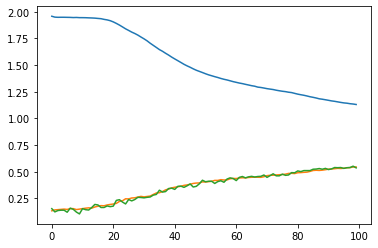

In [435]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')

pyplot.show()

## TanH

In [436]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='tanh'))

# hidden layers

model2.add(layers.Dense(10, activation='tanh'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.9598 - accuracy: 0.1569 - val_loss: 1.8898 - val_accuracy: 0.2667
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.8264 - accuracy: 0.2594 - val_loss: 1.6702 - val_accuracy: 0.3000
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.6029 - accuracy: 0.3286 - val_loss: 1.4884 - val_accuracy: 0.3524
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4615 - accuracy: 0.3819 - val_loss: 1.4082 - val_accuracy: 0.3889
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3857 - accuracy: 0.4040 - val_loss: 1.3359 - val_accuracy: 0.4381
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3178 - accuracy: 0.4311 - val_loss: 1.2940 - val_accuracy: 0.4159
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2734 - accuracy: 0.4467 - val_loss: 1.2312 - val_accuracy: 0.4762

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8043 - accuracy: 0.6492 - val_loss: 0.8014 - val_accuracy: 0.6460
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7972 - accuracy: 0.6449 - val_loss: 0.7969 - val_accuracy: 0.6540
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7898 - accuracy: 0.6429 - val_loss: 0.7946 - val_accuracy: 0.6429
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8104 - accuracy: 0.6356 - val_loss: 0.7879 - val_accuracy: 0.6476
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8241 - accuracy: 0.6187 - val_loss: 0.7980 - val_accuracy: 0.6365
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8072 - accuracy: 0.6333 - val_loss: 0.7923 - val_accuracy: 0.6460
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8042 - accuracy: 0.6300 - val_loss: 0.7872 - val_accuracy:

## ReLu

In [437]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(10, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.8808 - accuracy: 0.2331 - val_loss: 1.6238 - val_accuracy: 0.2841
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.5545 - accuracy: 0.3520 - val_loss: 1.4862 - val_accuracy: 0.3429
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4591 - accuracy: 0.3750 - val_loss: 1.4073 - val_accuracy: 0.3937
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4142 - accuracy: 0.3896 - val_loss: 1.3491 - val_accuracy: 0.4286
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3941 - accuracy: 0.3990 - val_loss: 1.3882 - val_accuracy: 0.3968
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3646 - accuracy: 0.4280 - val_loss: 1.3278 - val_accuracy: 0.4413
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3414 - accuracy: 0.4478 - val_loss: 1.3318 - val_accuracy: 0.3873

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8957 - accuracy: 0.6557 - val_loss: 0.7744 - val_accuracy: 0.7000
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7725 - accuracy: 0.7017 - val_loss: 0.8166 - val_accuracy: 0.6841
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7832 - accuracy: 0.6992 - val_loss: 0.7821 - val_accuracy: 0.6778
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7612 - accuracy: 0.7082 - val_loss: 0.8172 - val_accuracy: 0.7079
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7707 - accuracy: 0.6945 - val_loss: 1.0469 - val_accuracy: 0.6508
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8023 - accuracy: 0.6980 - val_loss: 0.8057 - val_accuracy: 0.6635
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8569 - accuracy: 0.6702 - val_loss: 0.7434 - val_accuracy:

## Conclusie

Kijkend naar de resultaten lijkt de ReLu beter te scoren dan de overige activatie functies. Daarna volgt de TanH. Sigmoid lijkt toch wat lager te zitten. Graag zou ik dezelfde functies met een dataset  testen die gebruik maakt van een MinMax scaler. De reden hiervoor is, omdat er wordt aangegeven dat deze functies minder goed kunnen omgaan met negatieve waardes. Dit zou ik graag willen controleren.

### Sigmoid

In [440]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='sigmoid'))

# hidden layers

model2.add(layers.Dense(10, activation='sigmoid'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_minmax, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.9600 - accuracy: 0.1373 - val_loss: 1.9463 - val_accuracy: 0.1444
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9518 - accuracy: 0.1433 - val_loss: 1.9473 - val_accuracy: 0.1667
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9517 - accuracy: 0.1495 - val_loss: 1.9604 - val_accuracy: 0.1302
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9515 - accuracy: 0.1453 - val_loss: 1.9616 - val_accuracy: 0.1222
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9504 - accuracy: 0.1468 - val_loss: 1.9459 - val_accuracy: 0.1667
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9517 - accuracy: 0.1435 - val_loss: 1.9477 - val_accuracy: 0.1270
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9513 - accuracy: 0.1345 - val_loss: 1.9500 - val_accuracy: 0.1524

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9457 - accuracy: 0.1542 - val_loss: 1.9506 - val_accuracy: 0.1460
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9450 - accuracy: 0.1618 - val_loss: 1.9537 - val_accuracy: 0.1270
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9444 - accuracy: 0.1544 - val_loss: 1.9485 - val_accuracy: 0.1254
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9444 - accuracy: 0.1428 - val_loss: 1.9477 - val_accuracy: 0.1508
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9436 - accuracy: 0.1612 - val_loss: 1.9475 - val_accuracy: 0.1540
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9440 - accuracy: 0.1488 - val_loss: 1.9409 - val_accuracy: 0.1619
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9436 - accuracy: 0.1468 - val_loss: 1.9524 - val_accuracy:

### TanH

In [441]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='tanh'))

# hidden layers

model2.add(layers.Dense(10, activation='tanh'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_minmax, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 2ms/step - loss: 1.9565 - accuracy: 0.1474 - val_loss: 1.9504 - val_accuracy: 0.1429
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9387 - accuracy: 0.1699 - val_loss: 1.9166 - val_accuracy: 0.1556
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.8933 - accuracy: 0.2172 - val_loss: 1.8487 - val_accuracy: 0.2365
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.8058 - accuracy: 0.2530 - val_loss: 1.8077 - val_accuracy: 0.2540
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.7300 - accuracy: 0.2689 - val_loss: 1.7715 - val_accuracy: 0.2714
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.6813 - accuracy: 0.3054 - val_loss: 1.7194 - val_accuracy: 0.2587
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.6342 - accuracy: 0.3256 - val_loss: 1.6143 - val_accuracy: 0.3190

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8530 - accuracy: 0.6651 - val_loss: 0.8303 - val_accuracy: 0.6683
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8422 - accuracy: 0.6781 - val_loss: 0.8744 - val_accuracy: 0.6635
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8447 - accuracy: 0.6825 - val_loss: 1.1907 - val_accuracy: 0.5587
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8505 - accuracy: 0.6693 - val_loss: 0.8496 - val_accuracy: 0.6698
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8631 - accuracy: 0.6755 - val_loss: 0.8212 - val_accuracy: 0.6794
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8457 - accuracy: 0.6746 - val_loss: 0.8335 - val_accuracy: 0.6698
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 0.8247 - accuracy: 0.6894 - val_loss: 0.8513 - val_accuracy:

## ReLu

In [444]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(10, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_minmax, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.9434 - accuracy: 0.1648 - val_loss: 1.9244 - val_accuracy: 0.1524
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9116 - accuracy: 0.1963 - val_loss: 1.8803 - val_accuracy: 0.2333
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.8469 - accuracy: 0.2399 - val_loss: 1.7445 - val_accuracy: 0.2825
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.6867 - accuracy: 0.3069 - val_loss: 1.8096 - val_accuracy: 0.2619
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.5845 - accuracy: 0.3285 - val_loss: 2.5085 - val_accuracy: 0.2127
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.5522 - accuracy: 0.3507 - val_loss: 1.5826 - val_accuracy: 0.3667
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.5124 - accuracy: 0.3603 - val_loss: 1.5368 - val_accuracy: 0.3349

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0036 - accuracy: 0.5891 - val_loss: 1.2253 - val_accuracy: 0.5032
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0590 - accuracy: 0.5824 - val_loss: 1.0029 - val_accuracy: 0.6048
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0590 - accuracy: 0.5709 - val_loss: 1.2096 - val_accuracy: 0.5286
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0112 - accuracy: 0.5959 - val_loss: 1.2377 - val_accuracy: 0.5175
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0363 - accuracy: 0.5809 - val_loss: 1.0510 - val_accuracy: 0.5921
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0200 - accuracy: 0.5978 - val_loss: 1.0124 - val_accuracy: 0.6016
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0114 - accuracy: 0.5949 - val_loss: 1.1751 - val_accuracy:

DIT S HET EFFECT....


Verdergaan met ReLu.

# Verschillende netwerken

Volgens het opdracht moeten we gebruik maken van minimaal 6 verschillende netwerken. Hiervoor zullen we de aantal hidden layers en de aantal nodes ervan veranderen.

## Netwerk 1

Bij het eerste netwerk zullen we gebruik maken van de volgende constructie:

- Input layer (5 nodes)
- Hidden layer (10 nodes)
- Hidden layer (10 nodes)
- Hidden layer (10 nodes)
- output layer 7 nodes

In [451]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.9112 - accuracy: 0.1887 - val_loss: 1.6367 - val_accuracy: 0.3175
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.5924 - accuracy: 0.3289 - val_loss: 1.5082 - val_accuracy: 0.3698
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4725 - accuracy: 0.3695 - val_loss: 1.3923 - val_accuracy: 0.3968
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4123 - accuracy: 0.4075 - val_loss: 1.3789 - val_accuracy: 0.4222
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3432 - accuracy: 0.4420 - val_loss: 1.4634 - val_accuracy: 0.3921
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.3212 - accuracy: 0.4613 - val_loss: 1.2923 - val_accuracy: 0.4238
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2828 - accuracy: 0.4793 - val_loss: 1.6454 - val_accuracy: 0.3683

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7116 - accuracy: 0.7243 - val_loss: 0.6609 - val_accuracy: 0.7429
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.7230 - val_loss: 0.6747 - val_accuracy: 0.7048
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 0.6705 - accuracy: 0.7343 - val_loss: 0.8038 - val_accuracy: 0.6921
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7370 - accuracy: 0.7109 - val_loss: 0.6219 - val_accuracy: 0.7587
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.7337 - val_loss: 0.8635 - val_accuracy: 0.6905
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 0.7102 - accuracy: 0.7202 - val_loss: 0.7327 - val_accuracy: 0.7190
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.7340 - val_loss: 0.7648 - val_accuracy:

### Resultaten in grafiek

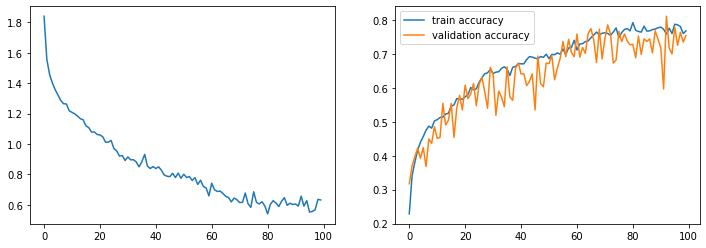

In [472]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

kijkend naar de resultaten valt het op dat de validation accuraacy in de buurt van de train accuracy zit. Alleen schommelt het nog wel een beetje. Dit kan komen omdat het model last heeft van een klein beetje overfitting. Daarnaast kijkend naar de loss lijkt her erop dat het model niet een te hoog learning rate heeft, maar ook niet te laag. Dit kunnen we concluderen omdat er een redelijke boog in de grafiek zit.

## Netwerk 2

Bij het eerste netwerk zullen we gebruik maken van de volgende constructie:

- Input layer (5 nodes)
- Hidden layer (5 nodes)
- Hidden layer (20 nodes)
- Hidden layer (20 nodes)
- Hidden layer (5 nodes)
- output layer 7 nodes

In [473]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(5, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(5, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.8991 - accuracy: 0.1778 - val_loss: 1.7024 - val_accuracy: 0.2413
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.6569 - accuracy: 0.2861 - val_loss: 1.5566 - val_accuracy: 0.3762
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.5727 - accuracy: 0.3285 - val_loss: 1.4974 - val_accuracy: 0.3651
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.5221 - accuracy: 0.3509 - val_loss: 1.4487 - val_accuracy: 0.3698
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4888 - accuracy: 0.3654 - val_loss: 1.4768 - val_accuracy: 0.3286
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.4434 - accuracy: 0.3627 - val_loss: 1.4441 - val_accuracy: 0.3873
Epoch 7/100
355/355 [==============================] - 1s 3ms/step - loss: 1.4205 - accuracy: 0.3823 - val_loss: 1.4298 - val_accuracy: 0.3635

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0668 - accuracy: 0.5531 - val_loss: 1.0450 - val_accuracy: 0.5556
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 1.1294 - accuracy: 0.5281 - val_loss: 1.1742 - val_accuracy: 0.5222
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 1.1325 - accuracy: 0.5328 - val_loss: 1.1349 - val_accuracy: 0.5317
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0793 - accuracy: 0.5373 - val_loss: 1.0579 - val_accuracy: 0.5587
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0544 - accuracy: 0.5634 - val_loss: 1.0771 - val_accuracy: 0.5540
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0582 - accuracy: 0.5486 - val_loss: 1.0867 - val_accuracy: 0.5730
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 1.0987 - accuracy: 0.5363 - val_loss: 1.0283 - val_accuracy:

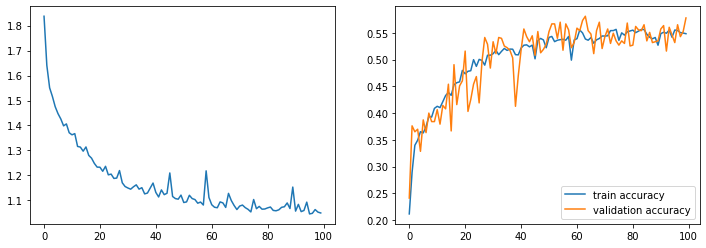

In [474]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

Ook hier lijkt de loss functie op een redelijke learning rate te staan. Alleen is de loss  nog steeds hoog. De accuraatheid zit hier ook laag en lijk het model ook last te hebben van een beetje overfitting. De validatie accuraatheid springt nog wel alle kanten op.

## Netwerk 3

Bij het eerste netwerk zullen we gebruik maken van de volgende constructie:

- Input layer (5 nodes)
- Hidden layer (10 nodes)
- Hidden layer (10 nodes)
- Hidden layer (10 nodes)
- Hidden layer (10 nodes)
- Hidden layer (10 nodes)
- Hidden layer (10 nodes)
- output layer 7 nodes

In [475]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 1s 2ms/step - loss: 1.8579 - accuracy: 0.1982 - val_loss: 1.7541 - val_accuracy: 0.2143
Epoch 2/100
355/355 [==============================] - 0s 1ms/step - loss: 1.5363 - accuracy: 0.3158 - val_loss: 1.4757 - val_accuracy: 0.3175
Epoch 3/100
355/355 [==============================] - 0s 1ms/step - loss: 1.4357 - accuracy: 0.3789 - val_loss: 1.3858 - val_accuracy: 0.4159
Epoch 4/100
355/355 [==============================] - 0s 1ms/step - loss: 1.3606 - accuracy: 0.4373 - val_loss: 2.1626 - val_accuracy: 0.3032
Epoch 5/100
355/355 [==============================] - 0s 1ms/step - loss: 1.3913 - accuracy: 0.4414 - val_loss: 1.9792 - val_accuracy: 0.2317
Epoch 6/100
355/355 [==============================] - 0s 1ms/step - loss: 1.2969 - accuracy: 0.4713 - val_loss: 1.2749 - val_accuracy: 0.4810
Epoch 7/100
355/355 [==============================] - 0s 1ms/step - loss: 1.2269 - accuracy: 0.4926 - val_loss: 1.7044 - val_accuracy: 0.2524

Epoch 58/100
355/355 [==============================] - 0s 1ms/step - loss: 0.9582 - accuracy: 0.6217 - val_loss: 0.9144 - val_accuracy: 0.6397
Epoch 59/100
355/355 [==============================] - 0s 1ms/step - loss: 0.9320 - accuracy: 0.6433 - val_loss: 0.7702 - val_accuracy: 0.7159
Epoch 60/100
355/355 [==============================] - 0s 997us/step - loss: 0.9002 - accuracy: 0.6671 - val_loss: 1.0126 - val_accuracy: 0.5667
Epoch 61/100
355/355 [==============================] - 0s 1ms/step - loss: 0.8790 - accuracy: 0.6583 - val_loss: 0.9829 - val_accuracy: 0.5937
Epoch 62/100
355/355 [==============================] - 0s 982us/step - loss: 0.8728 - accuracy: 0.6611 - val_loss: 0.9177 - val_accuracy: 0.6397
Epoch 63/100
355/355 [==============================] - 0s 992us/step - loss: 0.8967 - accuracy: 0.6549 - val_loss: 0.9995 - val_accuracy: 0.5651
Epoch 64/100
355/355 [==============================] - 0s 985us/step - loss: 0.9784 - accuracy: 0.6113 - val_loss: 0.9436 - val_a

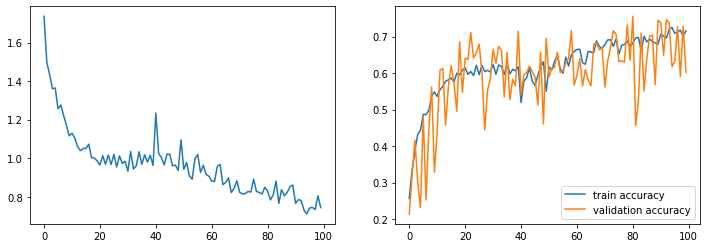

In [476]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

## netwerk 4

In [477]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 1s 2ms/step - loss: 1.8262 - accuracy: 0.2322 - val_loss: 1.7496 - val_accuracy: 0.2460
Epoch 2/100
355/355 [==============================] - 0s 1ms/step - loss: 1.4639 - accuracy: 0.3657 - val_loss: 1.5839 - val_accuracy: 0.3381
Epoch 3/100
355/355 [==============================] - 0s 1ms/step - loss: 1.3558 - accuracy: 0.4162 - val_loss: 1.3032 - val_accuracy: 0.4397
Epoch 4/100
355/355 [==============================] - 0s 1ms/step - loss: 1.2417 - accuracy: 0.4710 - val_loss: 1.2632 - val_accuracy: 0.4492
Epoch 5/100
355/355 [==============================] - 0s 1ms/step - loss: 1.1359 - accuracy: 0.5288 - val_loss: 1.0405 - val_accuracy: 0.5460
Epoch 6/100
355/355 [==============================] - 0s 1ms/step - loss: 1.0661 - accuracy: 0.5645 - val_loss: 0.9010 - val_accuracy: 0.6413
Epoch 7/100
355/355 [==============================] - 0s 1ms/step - loss: 0.9236 - accuracy: 0.6297 - val_loss: 1.4794 - val_accuracy: 0.4698

Epoch 58/100
355/355 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8734 - val_loss: 0.5030 - val_accuracy: 0.8381
Epoch 59/100
355/355 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8812 - val_loss: 0.4319 - val_accuracy: 0.8222
Epoch 60/100
355/355 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8827 - val_loss: 0.4023 - val_accuracy: 0.8238
Epoch 61/100
355/355 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8813 - val_loss: 0.4108 - val_accuracy: 0.8444
Epoch 62/100
355/355 [==============================] - 0s 1ms/step - loss: 0.3264 - accuracy: 0.8807 - val_loss: 0.6453 - val_accuracy: 0.7937
Epoch 63/100
355/355 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8742 - val_loss: 0.4790 - val_accuracy: 0.8397
Epoch 64/100
355/355 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8770 - val_loss: 0.4057 - val_accuracy:

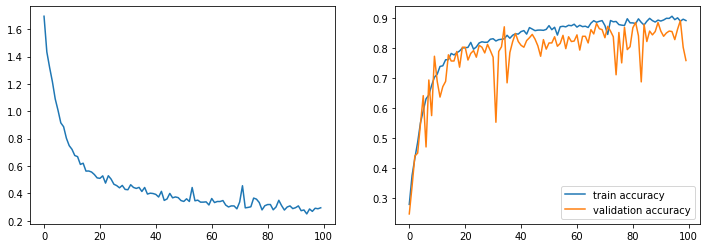

In [478]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

## Netwerk 5

In [479]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(32, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 1s 2ms/step - loss: 1.7843 - accuracy: 0.2461 - val_loss: 1.5671 - val_accuracy: 0.3238
Epoch 2/100
355/355 [==============================] - 0s 1ms/step - loss: 1.4770 - accuracy: 0.3661 - val_loss: 1.3496 - val_accuracy: 0.4333
Epoch 3/100
355/355 [==============================] - 0s 1ms/step - loss: 1.3094 - accuracy: 0.4368 - val_loss: 2.2038 - val_accuracy: 0.3556
Epoch 4/100
355/355 [==============================] - 0s 1ms/step - loss: 1.1723 - accuracy: 0.5315 - val_loss: 1.1464 - val_accuracy: 0.4810
Epoch 5/100
355/355 [==============================] - 0s 1ms/step - loss: 1.0303 - accuracy: 0.5901 - val_loss: 0.8680 - val_accuracy: 0.6635
Epoch 6/100
355/355 [==============================] - 0s 1ms/step - loss: 0.9125 - accuracy: 0.6402 - val_loss: 0.9661 - val_accuracy: 0.6095
Epoch 7/100
355/355 [==============================] - 0s 1ms/step - loss: 0.7872 - accuracy: 0.6896 - val_loss: 0.7073 - val_accuracy: 0.7127

Epoch 58/100
355/355 [==============================] - 0s 1ms/step - loss: 0.1955 - accuracy: 0.9364 - val_loss: 0.2393 - val_accuracy: 0.9270
Epoch 59/100
355/355 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9521 - val_loss: 0.1592 - val_accuracy: 0.9349
Epoch 60/100
355/355 [==============================] - 0s 1ms/step - loss: 0.1454 - accuracy: 0.9550 - val_loss: 0.1944 - val_accuracy: 0.9333
Epoch 61/100
355/355 [==============================] - 0s 1ms/step - loss: 0.1652 - accuracy: 0.9461 - val_loss: 0.1375 - val_accuracy: 0.9524
Epoch 62/100
355/355 [==============================] - 0s 1ms/step - loss: 0.1636 - accuracy: 0.9446 - val_loss: 0.2101 - val_accuracy: 0.9270
Epoch 63/100
355/355 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9603 - val_loss: 0.1738 - val_accuracy: 0.9286
Epoch 64/100
355/355 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.9589 - val_loss: 0.2617 - val_accuracy:

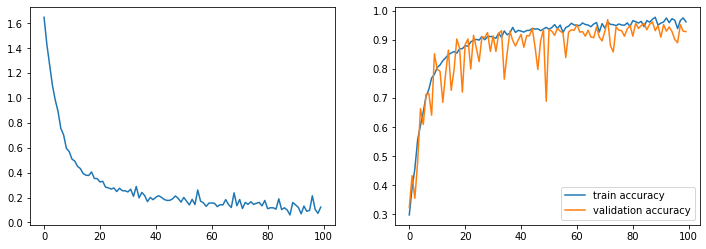

In [480]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

## Netwerk 6

In [481]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(5, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(5, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 1s 1ms/step - loss: 1.9560 - accuracy: 0.1533 - val_loss: 1.8568 - val_accuracy: 0.2571
Epoch 2/100
355/355 [==============================] - 0s 908us/step - loss: 1.7988 - accuracy: 0.2817 - val_loss: 1.7046 - val_accuracy: 0.2873
Epoch 3/100
355/355 [==============================] - 0s 901us/step - loss: 1.6611 - accuracy: 0.3168 - val_loss: 1.6080 - val_accuracy: 0.3254
Epoch 4/100
355/355 [==============================] - 0s 935us/step - loss: 1.5726 - accuracy: 0.3404 - val_loss: 1.5730 - val_accuracy: 0.3778
Epoch 5/100
355/355 [==============================] - 0s 935us/step - loss: 1.5203 - accuracy: 0.3547 - val_loss: 1.5388 - val_accuracy: 0.3889
Epoch 6/100
355/355 [==============================] - 0s 961us/step - loss: 1.5108 - accuracy: 0.3676 - val_loss: 1.5129 - val_accuracy: 0.3952
Epoch 7/100
355/355 [==============================] - 0s 997us/step - loss: 1.4940 - accuracy: 0.3735 - val_loss: 1.4847 - val_accu

355/355 [==============================] - 0s 912us/step - loss: 1.3308 - accuracy: 0.4438 - val_loss: 1.6609 - val_accuracy: 0.4333
Epoch 58/100
355/355 [==============================] - 0s 889us/step - loss: 1.3555 - accuracy: 0.4350 - val_loss: 1.3592 - val_accuracy: 0.4492
Epoch 59/100
355/355 [==============================] - 0s 951us/step - loss: 1.3078 - accuracy: 0.4475 - val_loss: 1.2982 - val_accuracy: 0.4587
Epoch 60/100
355/355 [==============================] - 0s 1ms/step - loss: 1.3301 - accuracy: 0.4458 - val_loss: 1.5720 - val_accuracy: 0.3825
Epoch 61/100
355/355 [==============================] - 0s 1ms/step - loss: 1.3507 - accuracy: 0.4307 - val_loss: 1.3448 - val_accuracy: 0.4000
Epoch 62/100
355/355 [==============================] - 0s 989us/step - loss: 1.2991 - accuracy: 0.4484 - val_loss: 1.3964 - val_accuracy: 0.4222
Epoch 63/100
355/355 [==============================] - 0s 997us/step - loss: 1.3146 - accuracy: 0.4450 - val_loss: 1.3293 - val_accuracy: 0.

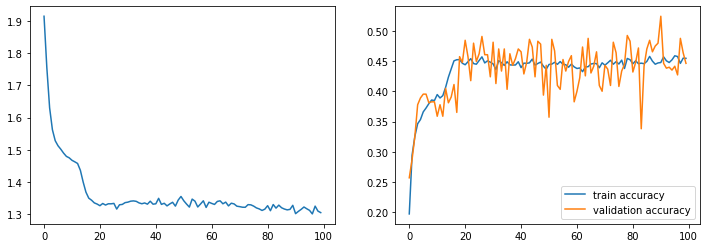

In [482]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

# Parameters tweaken

In [535]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(32, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_standard, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
355/355 [==============================] - 2s 3ms/step - loss: 1.9950 - accuracy: 0.1968 - val_loss: 1.9538 - val_accuracy: 0.1571
Epoch 2/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9519 - accuracy: 0.1823 - val_loss: 1.9463 - val_accuracy: 0.1508
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9439 - accuracy: 0.1901 - val_loss: 1.9423 - val_accuracy: 0.1968
Epoch 4/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9349 - accuracy: 0.2006 - val_loss: 1.9373 - val_accuracy: 0.2492
Epoch 5/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9318 - accuracy: 0.2216 - val_loss: 1.9335 - val_accuracy: 0.2302
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9203 - accuracy: 0.2474 - val_loss: 1.9234 - val_accuracy: 0.2460
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 1.9175 - accuracy: 0.2541 - val_loss: 1.9123 - val_accuracy: 0.2587

Epoch 58/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2616 - accuracy: 0.4773 - val_loss: 1.2717 - val_accuracy: 0.4714
Epoch 59/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2645 - accuracy: 0.4624 - val_loss: 1.2668 - val_accuracy: 0.4921
Epoch 60/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2596 - accuracy: 0.4808 - val_loss: 1.2575 - val_accuracy: 0.5000
Epoch 61/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2477 - accuracy: 0.4894 - val_loss: 1.2552 - val_accuracy: 0.4984
Epoch 62/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2461 - accuracy: 0.4826 - val_loss: 1.2517 - val_accuracy: 0.5032
Epoch 63/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2411 - accuracy: 0.4872 - val_loss: 1.2513 - val_accuracy: 0.4762
Epoch 64/100
355/355 [==============================] - 1s 2ms/step - loss: 1.2309 - accuracy: 0.4885 - val_loss: 1.2443 - val_accuracy:

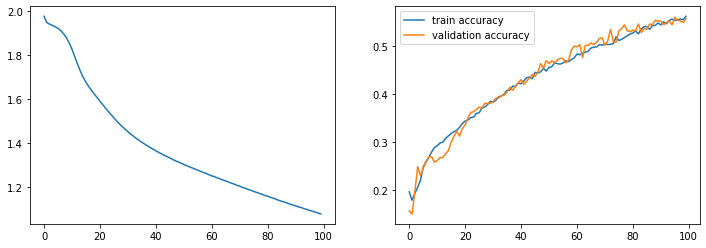

In [536]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

In [551]:
features_data = result[features]
class_data = result[outputs]

features_data.loc[[4097, 4106]].to_numpy()

In [556]:
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

acc_per_fold = []
loss_per_fold = []

fold_no = 1
for train, test in kfold.split(features_data, class_data):
    
    from sklearn.preprocessing import StandardScaler
    standardScaler = StandardScaler()
    X_train_standard = standardScaler.fit_transform(features_data.loc[train])
    
    model2 = None
    model2 = tf.keras.Sequential()

    # input layers
    model2.add(layers.Dense(10, input_dim=5, activation='relu'))

    # hidden layers

    model2.add(layers.Dense(32, activation='relu'))

    # output layers
    model2.add(layers.Dense(7, activation='softmax'))

    model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model2.fit(X_train_standard, class_data.loc[train], validation_split=0.1, epochs=50, batch_size=8, verbose=0)
    
    x_test_standard = standardScaler.transform(features_data.loc[test])
    
    # Generate generalization metrics
    scores = model.evaluate(x_test_standard, class_data.loc[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 1.9307701587677002; accuracy of 10.111396759748459%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 1.9306879043579102; accuracy of 8.140531182289124%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 1.9304722547531128; accuracy of 11.835334450006485%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 1.9314391613006592; accuracy of 10.205832123756409%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 1.9314628839492798; accuracy of 9.348198771476746%


In [581]:
# ALLES HIERONDER IS OM HET MODEL TE EVALUAREN. MAAR HET PRESTEERT GWN FAKKING SHIT.

In [568]:
X_train, X_test, y_train, y_test = train_test_split(
        result_balanced[features], result_balanced[outputs], test_size=0.1, random_state=28, shuffle=True)


from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
X_train_minmax = minmaxScaler.fit_transform(X_train)
X_train_minmax
X_test_minmax = minmaxScaler.transform(X_test)
X_test_minmax

array([[0.2, 0.6, 0.6, 0. , 0.6],
       [0. , 0.4, 1. , 0. , 0. ],
       [0.8, 0.4, 0.8, 0.8, 0. ],
       [1. , 0.4, 0.2, 0.4, 0.4],
       [0.8, 0.8, 0.2, 0.2, 1. ],
       [0.6, 0.6, 0.6, 0.6, 0.6],
       [0.8, 1. , 0.8, 0.4, 0.6],
       [0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 1. , 0. , 1. , 0.8],
       [1. , 0.4, 0.6, 0.6, 0.8],
       [1. , 1. , 0.4, 0.6, 1. ],
       [0.6, 0.8, 0.6, 0.4, 0.8],
       [0. , 1. , 0. , 1. , 0. ],
       [0.2, 0.6, 1. , 0.8, 0.4],
       [1. , 1. , 0.8, 1. , 0.8],
       [0.4, 0.6, 0.4, 0.8, 1. ],
       [0.6, 0.6, 0. , 0.6, 0. ],
       [0. , 0.6, 0.6, 0.6, 0.6],
       [0.4, 0.4, 0.4, 0.4, 0.4],
       [0.2, 0.2, 1. , 0.2, 0.2],
       [0. , 0.8, 0.8, 0.8, 0.8],
       [0.4, 0.2, 0.8, 1. , 0.6],
       [0.4, 0.2, 1. , 1. , 1. ],
       [0. , 0. , 0. , 0.2, 0.4],
       [0.6, 0.4, 0.6, 0.4, 0.6],
       [0. , 0.2, 0.8, 0. , 0.8],
       [0. , 0.2, 0.2, 0. , 0.2],
       [0.2, 0.2, 0. , 0.2, 0.2],
       [0.6, 0.6, 0.6, 0.6, 0.6],
       [1. , 0

In [580]:
model2 = None
model2 = tf.keras.Sequential()

# input layers
model2.add(layers.Dense(10, input_dim=5, activation='relu'))

# hidden layers

model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))

# output layers
model2.add(layers.Dense(7, activation='softmax'))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_test_minmax, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
40/40 [==============================] - 1s 12ms/step - loss: 1.9516 - accuracy: 0.1319 - val_loss: 1.9840 - val_accuracy: 0.1286
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 1.9608 - accuracy: 0.1335 - val_loss: 1.9775 - val_accuracy: 0.1429
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 1.9523 - accuracy: 0.1355 - val_loss: 1.9726 - val_accuracy: 0.1429
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 1.9444 - accuracy: 0.1822 - val_loss: 1.9685 - val_accuracy: 0.1429
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 1.9450 - accuracy: 0.1668 - val_loss: 1.9658 - val_accuracy: 0.1286
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 1.9495 - accuracy: 0.1424 - val_loss: 1.9633 - val_accuracy: 0.1429
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 1.9472 - accuracy: 0.1489 - val_loss: 1.9612 - val_accuracy: 0.1571
Epoch 8/100


Epoch 59/100
40/40 [==============================] - 0s 4ms/step - loss: 1.9209 - accuracy: 0.2394 - val_loss: 1.9519 - val_accuracy: 0.1286
Epoch 60/100
40/40 [==============================] - 0s 6ms/step - loss: 1.9289 - accuracy: 0.1880 - val_loss: 1.9512 - val_accuracy: 0.1286
Epoch 61/100
40/40 [==============================] - 0s 5ms/step - loss: 1.9318 - accuracy: 0.2045 - val_loss: 1.9505 - val_accuracy: 0.1286
Epoch 62/100
40/40 [==============================] - 0s 6ms/step - loss: 1.9260 - accuracy: 0.2021 - val_loss: 1.9496 - val_accuracy: 0.1000
Epoch 63/100
40/40 [==============================] - 0s 5ms/step - loss: 1.9352 - accuracy: 0.1795 - val_loss: 1.9504 - val_accuracy: 0.1286
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 1.9339 - accuracy: 0.1822 - val_loss: 1.9505 - val_accuracy: 0.1286
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 1.9347 - accuracy: 0.1906 - val_loss: 1.9505 - val_accuracy: 0.1143
Epoch 

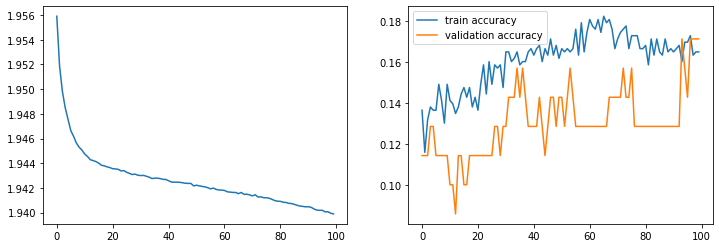

In [579]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
pyplot.legend()
pyplot.show()

In [576]:
X_test_minmax

array([[0.2, 0.6, 0.6, 0. , 0.6],
       [0. , 0.4, 1. , 0. , 0. ],
       [0.8, 0.4, 0.8, 0.8, 0. ],
       [1. , 0.4, 0.2, 0.4, 0.4],
       [0.8, 0.8, 0.2, 0.2, 1. ],
       [0.6, 0.6, 0.6, 0.6, 0.6],
       [0.8, 1. , 0.8, 0.4, 0.6],
       [0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 1. , 0. , 1. , 0.8],
       [1. , 0.4, 0.6, 0.6, 0.8],
       [1. , 1. , 0.4, 0.6, 1. ],
       [0.6, 0.8, 0.6, 0.4, 0.8],
       [0. , 1. , 0. , 1. , 0. ],
       [0.2, 0.6, 1. , 0.8, 0.4],
       [1. , 1. , 0.8, 1. , 0.8],
       [0.4, 0.6, 0.4, 0.8, 1. ],
       [0.6, 0.6, 0. , 0.6, 0. ],
       [0. , 0.6, 0.6, 0.6, 0.6],
       [0.4, 0.4, 0.4, 0.4, 0.4],
       [0.2, 0.2, 1. , 0.2, 0.2],
       [0. , 0.8, 0.8, 0.8, 0.8],
       [0.4, 0.2, 0.8, 1. , 0.6],
       [0.4, 0.2, 1. , 1. , 1. ],
       [0. , 0. , 0. , 0.2, 0.4],
       [0.6, 0.4, 0.6, 0.4, 0.6],
       [0. , 0.2, 0.8, 0. , 0.8],
       [0. , 0.2, 0.2, 0. , 0.2],
       [0.2, 0.2, 0. , 0.2, 0.2],
       [0.6, 0.6, 0.6, 0.6, 0.6],
       [1. , 0

In [577]:
resultje = model.evaluate(X_test_minmax, y_test, batch_size=16,verbose=1)
resultje

44/44 [==============================] - 0s 2ms/step - loss: 1.9464 - accuracy: 0.1443


[1.9463908672332764, 0.14428570866584778]

In [537]:
X_test_standard = standardScaler.transform(X_test)

In [539]:
resultje = model.evaluate(X_test_standard,y_test, batch_size=16,verbose=1)
resultje

44/44 [==============================] - 0s 1ms/step - loss: 1.9484 - accuracy: 0.1443


[1.9483962059020996, 0.14428570866584778]